# MACHINE LEARNING TECHNIQUES FOR CROP YIELD PREDICTION

In [1]:
# pip install tensorflow

In [2]:
# !pip install pandas

# Data Analysis And Preprocessing

In [3]:
# !pip install seaborn

In [4]:
# !pip install scikit-learn

In [5]:
#  IMPORTING LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [6]:
# LOADING DATA

data = pd.read_csv('indiancrop_dataset.csv')
data

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [7]:
# CHECKING FOR NULL VALUES

data.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

In [8]:
# CHECKING THE INFORMATION ABOUT DATA

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


In [9]:
data.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_4532\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
N_SOIL,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.001302
P_SOIL,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.023683
K_SOIL,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.021923
TEMPERATURE,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.029044
HUMIDITY,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.041414
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.033548
RAINFALL,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.058847
CROP_PRICE,-0.001302,-0.023683,-0.021923,-0.029044,-0.041414,-0.033548,0.058847,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_4532\4268820171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap="crest")


<Axes: >

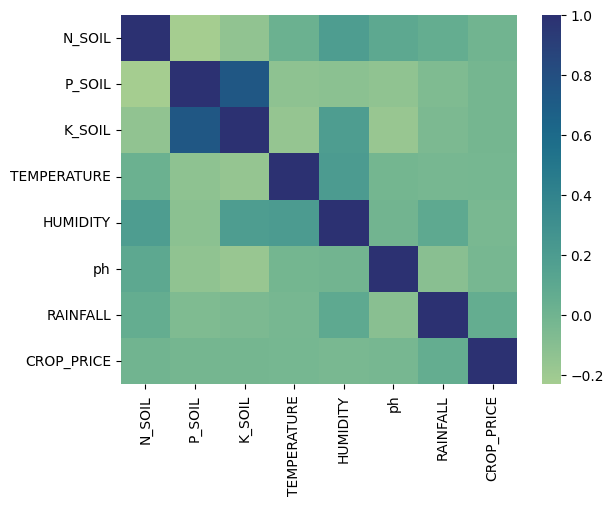

In [10]:
sns.heatmap(data.corr(),cmap="crest")

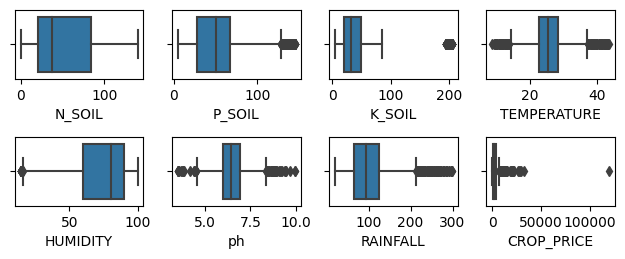

In [11]:
# CHECKING FOR OUTLIERS

plt.subplot(4,4,1)
sns.boxplot(x='N_SOIL',data=data)
plt.subplot(4,4,2)
sns.boxplot(x='P_SOIL',data=data)
plt.subplot(4,4,3)
sns.boxplot(x='K_SOIL',data=data)
plt.subplot(4,4,4)
sns.boxplot(x='TEMPERATURE',data=data)
plt.subplot(4,4,5)
sns.boxplot(x='HUMIDITY',data=data)
plt.subplot(4,4,6)
sns.boxplot(x='ph',data=data)
plt.subplot(4,4,7)
sns.boxplot(x='RAINFALL',data=data)
plt.subplot(4,4,8)
sns.boxplot(x='CROP_PRICE',data=data)
plt.tight_layout()

In [12]:
#  OUTLIERS HANDLING

import numpy as np
q1,q2,q3 = np.percentile(data['P_SOIL'],[25,50,75])
q1,q2,q3
IQR = q3-q1
IQR
lower = q1-1.5*IQR
upper = q3+1.5*IQR
print("lower: ",lower)
print("upper: ",upper)
filter_data = data[(data['P_SOIL']>lower)& (data['P_SOIL']<upper)]
filter_data

lower:  -32.0
upper:  128.0


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [13]:
q1,q2,q3 = np.percentile(filter_data['K_SOIL'],[25,50,75])
q1,q2,q3
IQR = q3-q1
IQR
lower = q1-1.5*IQR
upper = q3+1.5*IQR
print("lower: ",lower)
print("upper: ",upper)
filter_data = filter_data[(filter_data['K_SOIL']>lower)& (filter_data['K_SOIL']<upper)]
filter_data

lower:  -19.0
upper:  85.0


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [14]:
q1,q2,q3 = np.percentile(filter_data['TEMPERATURE'],[25,50,75])
q1,q2,q3
IQR = q3-q1
IQR
lower = q1-1.5*IQR
upper = q3+1.5*IQR
print("lower: ",lower)
print("upper: ",upper)
filter_data = filter_data[(filter_data['TEMPERATURE']>lower)& (filter_data['TEMPERATURE']<upper)]
filter_data

lower:  15.166832743749993
upper:  36.756535993750006


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [15]:
q1,q2,q3 = np.percentile(filter_data['HUMIDITY'],[25,50,75])
q1,q2,q3
IQR = q3-q1
IQR
lower = q1-1.5*IQR
upper = q3+1.5*IQR
print("lower: ",lower)
print("upper: ",upper)
filter_data = filter_data[(filter_data['HUMIDITY']>lower)& (filter_data['HUMIDITY']<upper)]
filter_data

lower:  11.438428817499997
upper:  133.51156427749999


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [16]:
q1,q2,q3 = np.percentile(filter_data['ph'],[25,50,75])
q1,q2,q3
IQR = q3-q1
IQR
lower = q1-1.5*IQR
upper = q3+1.5*IQR
print("lower: ",lower)
print("upper: ",upper)
filter_data = filter_data[(filter_data['ph']>lower)& (filter_data['ph']<upper)]
filter_data

lower:  4.593178154375001
upper:  8.397078205375


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [17]:
q1,q2,q3 = np.percentile(filter_data['RAINFALL'],[25,50,75])
q1,q2,q3
IQR = q3-q1
IQR
lower = q1-1.5*IQR
upper = q3+1.5*IQR
print("lower: ",lower)
print("upper: ",upper)
filter_data = filter_data[(filter_data['RAINFALL']>lower)& (filter_data['RAINFALL']<upper)]
filter_data

lower:  -51.28622456874997
upper:  250.52705606124997


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,Andaman and Nicobar,6500,Rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,Andaman and Nicobar,10000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [18]:
q1,q2,q3 = np.percentile(filter_data['CROP_PRICE'],[25,50,75])
q1,q2,q3
IQR = q3-q1
IQR
lower = q1-1.5*IQR
upper = q3+1.5*IQR
print("lower: ",lower)
print("upper: ",upper)
filter_data = filter_data[(filter_data['CROP_PRICE']>lower)& (filter_data['CROP_PRICE']<upper)]
filter_data

lower:  -2818.75
upper:  7291.25


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,Andaman and Nicobar,6500,Rice
11,90,46,42,23.978982,81.450616,7.502834,250.083234,Andaman and Nicobar,5600,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [19]:
#  CONVERTING CATEGORICAL TO NUMERICAL USING LABEL ENCODER

le = LabelEncoder()
filter_data['STATE'] = le.fit_transform(filter_data['STATE'])
filter_data['CROP'] = le.fit_transform(filter_data['CROP'])
filter_data

C:\Users\USER\AppData\Local\Temp\ipykernel_4532\3552684412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data['STATE'] = le.fit_transform(filter_data['STATE'])
C:\Users\USER\AppData\Local\Temp\ipykernel_4532\3552684412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data['CROP'] = le.fit_transform(filter_data['CROP'])


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,7000,18
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,5000,18
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,7000,18
7,94,53,40,20.277744,82.894086,5.718627,241.974195,0,6500,18
11,90,46,42,23.978982,81.450616,7.502834,250.083234,0,5600,18
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,23,1000,4
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,23,800,4
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,23,560,4
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,23,1500,4


In [20]:
# SPLITTING X AND Y VALUES

x = filter_data.drop(['CROP'],axis=1)
x

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,5000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,7000
7,94,53,40,20.277744,82.894086,5.718627,241.974195,0,6500
11,90,46,42,23.978982,81.450616,7.502834,250.083234,0,5600
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,23,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,23,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,23,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,23,1500


In [21]:
y = filter_data['CROP']
y

0       18
1       18
3       18
7       18
11      18
        ..
2195     4
2196     4
2197     4
2198     4
2199     4
Name: CROP, Length: 1734, dtype: int32

# Cross Validation Using Cross_Val_Score

In [22]:
lr =[]
rf =[]
dt =[]
knn =[]
dt = cross_val_score(DecisionTreeClassifier(),X=x,y=y,cv=5,scoring='accuracy')
rf = cross_val_score(RandomForestClassifier(),X=x,y=y,cv=5,scoring='accuracy')
lr = cross_val_score(LogisticRegression(),X=x,y=y,cv=5,scoring='accuracy')
knn = cross_val_score(KNeighborsClassifier(),X=x,y=y,cv=5,scoring='accuracy')

C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [23]:
lr

array([0.82420749, 0.84149856, 0.8443804 , 0.77233429, 0.73699422])

In [24]:
rf

array([1., 1., 1., 1., 1.])

In [25]:
dt

array([0.97982709, 0.99711816, 1.        , 1.        , 0.89017341])

In [26]:
knn

array([0.4870317 , 0.50144092, 0.49279539, 0.47262248, 0.49132948])

In [27]:
import statistics
statistics.mean(lr)

0.8038829937865436

In [28]:
statistics.mean(rf)

1.0

In [29]:
statistics.mean(dt)

0.9734237310722793

In [30]:
statistics.mean(knn)

0.48904399393646614

# RANDOM FOREST IS THE BEST MODEL

# Parameter Tuning Using Randomized Search CV

In [31]:
from sklearn.model_selection import RandomizedSearchCV
param = {'criterion':["gini", "entropy"],'class_weight':["balanced","balanced_subsample"],'ccp_alpha':[0.0,0.1,0.2]}
rand_cv = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param,cv=5,return_train_score=False)
rand_cv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'ccp_alpha': [0.0, 0.1, 0.2],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy']})

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)
len(xtrain),len(ytrain)

(1213, 1213)

In [33]:
len(xtest),len(ytest)

(521, 521)

In [34]:
rand_cv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'ccp_alpha': [0.0, 0.1, 0.2],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy']})

# prediction using random forest algorithm

In [35]:
res = rand_cv.predict([[104,18,30,23.603016,60.396475,6.779833,140.937041,23,1400]])

C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [36]:
crop = le.inverse_transform(res)
print("The crop is: ",crop)

The crop is:  ['Coffee']


# accuracy

In [37]:
ypred_rf = rand_cv.predict(xtest)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
acc_rf = accuracy_score(ytest,ypred_rf)*100
print("Accuracy:",acc_rf)
cm_rf = confusion_matrix(ytest,ypred_rf)
print('confussion metrics is :',cm_rf)
print("classification_report:",classification_report(ytest,ypred_rf))

Accuracy: 100.0
confussion metrics is : [[27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0]
 [ 0  0  0  0  

<Axes: >

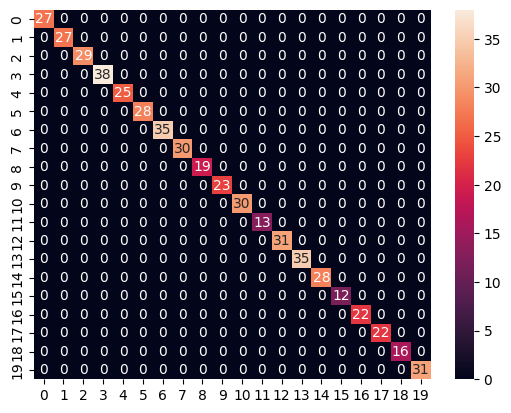

In [38]:
sns.heatmap(cm_rf,annot=True)